In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os

# Warnings
import warnings
warnings.filterwarnings('ignore')



In [4]:
df = pd.read_csv('spam.csv', encoding='latin-1')[['v1', 'v2']]

In [5]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
df.columns = ["class", "message"]

In [7]:
df.head()

,class,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
class      5572 non-null object
message    5572 non-null object
dtypes: object(2)
memory usage: 43.6+ KB


In [9]:
df.groupby('class').describe()

message                                                               
        count unique                                                top freq
class                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

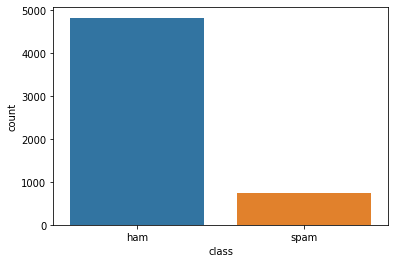

In [10]:
sns.countplot(data = df, x = 'class')

In [11]:
len(df)

5572

In [12]:
import string
from nltk.corpus import stopwords
from nltk import PorterStemmer as stemmer
clean = ""


In [13]:
def process(text):
    text = text.lower()
    text = ''.join([t for t in text if t not in string.punctuation])
    text = [t for t in text.split() if t not in stopwords.words('english')]
    st = stemmer()
    text = [st.stem(t) for t in text]
    clean = text
    return text

In [14]:
process('I am going to hyd.,,,')

['go', 'hyd']

In [15]:
process('It\'s holiday and we are playing cricket. Jeff is playing very well!!!')

['holiday', 'play', 'cricket', 'jeff', 'play', 'well']

In [16]:
df['message'][:5].apply(process)

0    [go, jurong, point, crazi, avail, bugi, n, gre...
1                         [ok, lar, joke, wif, u, oni]
2    [free, entri, 2, wkli, comp, win, fa, cup, fin...
3        [u, dun, say, earli, hor, u, c, alreadi, say]
4    [nah, dont, think, goe, usf, live, around, tho...
Name: message, dtype: object

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfv = TfidfVectorizer(analyzer=process)
data = tfidfv.fit_transform(df['message'])


In [18]:
print(data)

  (0, 7578)	0.18721401376124908
  (0, 1108)	0.3370037927640927
  (0, 3325)	0.15831816099050625
  (0, 1980)	0.2847021659551826
  (0, 1697)	0.32170654755913036
  (0, 2637)	0.1997662195999237
  (0, 4200)	0.2847021659551826
  (0, 7782)	0.22901968309377968
  (0, 3363)	0.18757162448436224
  (0, 4872)	0.18284951338255953
  (0, 1699)	0.2847021659551826
  (0, 1297)	0.25626412810936644
  (0, 2200)	0.26098623921116915
  (0, 5533)	0.2301133147049114
  (0, 4057)	0.3370037927640927
  (0, 3272)	0.13554044792902678
  (1, 5193)	0.5516408469094822
  (1, 7289)	0.2024772238069804
  (1, 7695)	0.4355907679554564
  (1, 4023)	0.46742635237301533
  (1, 4235)	0.41207318189732706
  (1, 5163)	0.27688324362563543
  (2, 72)	0.2330497030932461
  (2, 1180)	0.16669800498830506
  (2, 5815)	0.2330497030932461
  :	:
  (5568, 8092)	0.35648782557862696
  (5568, 1325)	0.3853580960760783
  (5568, 3621)	0.31940894217818255
  (5568, 3272)	0.2525170694634205
  (5569, 6460)	0.5375461940984255
  (5569, 5470)	0.5375461940984255
  

In [19]:
alpha = process('Hey, i need a favour favour')
alpha

['hey', 'need', 'favour', 'favour']

In [20]:
print(tfidfv.transform([alpha[2]]))

  (0, 2923)	1.0


In [21]:
print(tfidfv.transform([alpha[1]]))

  (0, 4926)	1.0


In [24]:
print(tfidfv.transform([alpha[3]]))

  (0, 2923)	1.0


In [25]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
spam_filter = Pipeline([('vectorizer', TfidfVectorizer(analyzer=process)), ('classifier', MultinomialNB())])

In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df['message'], df['class'], test_size=0.20, random_state = 21)

In [27]:
spam_filter.fit(x_train, y_train)

Pipeline(memory=None,
         steps=[('vectorizer',
                 TfidfVectorizer(analyzer=<function process at 0x1CE15930>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [28]:
predictions = spam_filter.predict(x_train)

In [29]:
predictions_test = spam_filter.predict(y_test)

In [30]:
count = 0
for i in range(len(y_test)):
    if y_train.iloc[i] != predictions_test[i]:
        count += 1
print("Total number of columns in test data",len(y_test))
print("no of wrong predicitons",count)

Total number of columns in test data 1115
no of wrong predicitons 154


In [31]:
count = 0
for i in range(len(y_train)):
    if y_train.iloc[i] != predictions[i]:
        count += 1
print('Total number of test cases', len(y_train))
print('Number of wrong of predictions', count)

Total number of test cases 4457
Number of wrong of predictions 111


In [32]:
from sklearn.metrics import classification_report
print(classification_report(predictions, y_train))

              precision    recall  f1-score   support

         ham       1.00      0.97      0.99      3961
        spam       0.82      1.00      0.90       496

    accuracy                           0.98      4457
   macro avg       0.91      0.99      0.94      4457
weighted avg       0.98      0.98      0.98      4457



In [33]:
def detect_spam(s):
    return spam_filter.predict([s])[0]
detect_spam('I will call you tomorrow buddy')

'ham'

In [34]:
detect_spam("Your cash-balance is currently 500 pounds - to maximize your cash-in now, send COLLECT to 83600.")

'spam'

In [35]:
text = process("Your mobile Number won  $615000 million dollars in Apple iphone UK.RegNo:NK115G For claim email our country and occupaition to freeappleiphone@wc.in")

In [36]:
text

['mobil',
 'number',
 '615000',
 'million',
 'dollar',
 'appl',
 'iphon',
 'ukregnonk115g',
 'claim',
 'email',
 'countri',
 'occupait',
 'freeappleiphonewcin']

In [37]:
detect_spam("You  could be entitled up to £3,160 in compensation from mis-sold PPI on a credit card or loan. Please reply PPI for info or STOP to opt out.")

'spam'

In [38]:
from sklearn.metrics import confusion_matrix 
results = confusion_matrix(predictions, y_train) 

In [39]:
results

array([[3850,  111],
       [   0,  496]], dtype=int64)

In [40]:
from sklearn.metrics import accuracy_score 
accuracy_score(predictions, y_train) 
accuracy_score

<function sklearn.metrics.classification.accuracy_score(y_true, y_pred, normalize=True, sample_weight=None)>

In [41]:
print(accuracy_score)

<function accuracy_score at 0x1CA25228>


In [42]:
from sklearn.metrics import classification_report 
classification_report(predictions, y_train) 

'              precision    recall  f1-score   support\n\n         ham       1.00      0.97      0.99      3961\n        spam       0.82      1.00      0.90       496\n\n    accuracy                           0.98      4457\n   macro avg       0.91      0.99      0.94      4457\nweighted avg       0.98      0.98      0.98      4457\n'